# Analysis and Visualization of Training Phase

This notebook focuses on plotting and analyzing the training phase, including mean reward of each level and the total length of the phase, using the `tensorboard` logs. 

### Importing Necessary Libraries

The code in this cell imports the necessary libraries for data handling and visualization:

1. **`os`**: This module provides a way of using operating system dependent functionality like reading or writing to the file system.
   
2. **`matplotlib.pyplot` as `plt`**: This module is used for creating static, animated, and interactive visualizations in Python. It provides a MATLAB-like interface for plotting.
   
3. **`pandas as pd`**: This library is used for data manipulation and analysis. It provides data structures and functions needed to manipulate structured data seamlessly.
   
4. **`matplotlib.lines as m_lines`**: This module within `matplotlib` is used for creating and manipulating line objects in a plot, which are essential for creating detailed and customized visualizations.

These imports set up the necessary tools for reading data, manipulating it, and visualizing it effectively.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as m_lines

### Setting save path

The next cell contains the variable `group` and `name`, which tells in which folder the plots will be saved into.
The full save path will be: *output/runs/{group}/{run}/plots/*

In [2]:
group="high_density"
name = "hd_no_retr_coll_128"

### Data Normalization Function

The `normalize_column` function is used to normalize the values in a specified column of a DataFrame to a range between 0 and 1. 

**Function Definition**:
- **Input**: 
  - `df`: The DataFrame containing the data.
  - `column_name`: The name of the column to be normalized.
- **Output**: 
  - A Series with the normalized values of the specified column.

In [3]:
def normalize_column(df, column_name):
    column = df[column_name]
    normalized_column = (column - column.min()) / (column.max() - column.min())
    return normalized_column

### Extract Last Six Digits Function

The `extract_last_six_digits` function extracts the last six digits from a given number.

**Function Definition**:
- **Input**: 
  - `num`: The number from which to extract the last six digits.
- **Output**: 
  - A string containing the last six digits of the input number.

In [4]:
def extract_last_six_digits(num):
    return str(num)[-6:]

### Plot Cumulative Reward Function

The `plot_cumulative_reward` function is used to visualize the cumulative reward over time during the training phase of a model. This function takes a DataFrame containing the reward data, a DataFrame with step data, and a run name for the title.

**Function Definition**:
- **Input**:
  - `df`: DataFrame containing reward data.
  - `df_step`: DataFrame containing step information, including environment labels and minimum scores.
  - `run_name`: A string representing the name of the run, used in the plot title.
- **Output**:
  - A plot displaying the cumulative reward and its smoothed version over time, along with environment phases and minimum scores.

**Plot Components**:
1. **Colors**:
   - A predefined list of colors is used for differentiating environment phases.

2. **Normalization and Smoothing**:
   - The first column of `df` is normalized by subtracting the initial wall value.
   - The cumulative reward data is smoothed using a rolling mean with a window of 10.

3. **Figure and Axes**:
   - A large figure is created for detailed visualization.
   - Both the raw and smoothed cumulative reward are plotted.

4. **Environment Phases**:
   - Environment phases are indicated using vertical spans with varying opacity.
   - Minimum scores are plotted as dashed horizontal lines.
   - Phase labels are added vertically at appropriate positions.

5. **Plot Customization**:
   - Titles and labels are set for clarity.
   - A legend is created to explain the plot elements.

In [5]:
def plot_cumulative_reward(df, df_step, run_name):
    colors = [
        '#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51',
        '#1d3557', '#457b9d', '#003049', '#a8dadc', '#d62828',
        '#f77f00', '#d62828', '#f77f00', '#fcbf49', '#eae2b7',
        '#2b2d42', '#8d99ae', '#edf2f4', '#ef233c', '#d90429',
        '#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff',
        '#a0c4ff', '#bdb2ff', '#ffc6ff', '#fffffc', '#3a86ff',
        '#8338ec', '#ff006e', '#fb5607', '#ffbe0b', '#00b4d8',
        '#0077b6', '#90e0ef', '#caf0f8', '#ade8f4', '#48cae4'
    ]

    y_lim = -40
    labels = df_step['Environment']
    wall = df_step['Wall']
    df_min_score = df_step['MinScore']

    df['Normalized_Column'] = df.iloc[:, 0] - wall.iloc[0]
    wall = wall - wall.iloc[0]
    
    df_smooth = df.iloc[:, 2].rolling(window=10).mean()

    fig, ax = plt.subplots(figsize=(25, 10))
   
    ax.plot(df['Normalized_Column'], df.iloc[:, 2], color="#3399e6", lw=2, alpha=0.5, label="Cumulative Reward")
    ax.plot(df['Normalized_Column'], df_smooth, color="red", lw=2, label="Cumulative Reward Smoothed")

    for i, val in enumerate(wall):
        if i == 0 or (i != 0 and labels[i] != "End"):
            ax.axvspan(wall[i] - 0.2, wall[i], facecolor=colors[i], alpha=0.8)
            ax.axvspan(wall[i], wall[i + 1], facecolor=colors[i], alpha=0.4)
            ax.hlines(y=float(df_min_score[i]), linestyle='--', color='black', lw=1,
                      xmin=wall[i], xmax=wall[i + 1], label=f"min score: {labels[i]}")
            ax.text((wall[i] + wall[i + 1]) / 2, y_lim + 2, labels[i], fontsize=20, color='black', rotation="vertical")

    ax.set_ylim(y_lim, 20)
    plt.title('Plot of cumulative reward during the model training phase: ' + run_name, fontsize=32)
    plt.xlabel('Seconds', fontsize=24)
    plt.ylabel('Mean Reward', fontsize=24)

    red_line = m_lines.Line2D([], [], color='red', markersize=15, label='Cumulative Reward Smoothed', linewidth=2)
    blue_line = m_lines.Line2D([], [], color='#3399e6', markersize=15, label='Cumulative Reward', linewidth=2)
    black_dash_line = m_lines.Line2D([], [], color='black', markersize=15, label='Min Score', linewidth=2, linestyle='--')

    plt.legend(handles=[blue_line, red_line, black_dash_line], loc='upper right', fontsize=20)
    plt.savefig(f'../output/runs/{group}/{name}/plots/episode_reward_mean_{name}.png')
    plt.show()

### Plot Episode Length Function

The `plot_episode_length` function is designed to visualize the length of episodes during a model's training phase. This plot can help identify trends in how long episodes last as the model trains and how they are influenced by different environments or phases of the training process.

**Function Definition**:
- **Inputs**:
  - `df`: A DataFrame containing data on episode lengths.
  - `df_step`: A DataFrame with metadata about the training steps, such as environments and their respective timestamps (walls).
  - `run_name`: A string indicating the name of the training run, used in the plot title.
- **Output**:
  - A plot that illustrates the episode lengths across the training duration, highlighting different training environments.

**Plot Components**:
1. **Color Scheme**:
   - A list of predefined colors used to visually distinguish between different training environments.

2. **Data Normalization**:
   - The first column of `df` is normalized relative to the initial timestamp in `wall`.

3. **Smoothing**:
   - Episode length data is smoothed using a rolling mean with a window size of 10 to better visualize trends.

4. **Figure and Axes**:
   - The plot is created on a large figure to accommodate detailed data visualization.

5. **Environment Visualization**:
   - Colored spans indicate different training environments.
   - Environment labels are placed centrally within their respective spans for easy identification.

6. **Final Touches**:
   - A timestamp at the end of the last environment shows the total training time.
   - Titles, labels, and a legend enhance the plot's readability.

In [6]:
def plot_episode_length(df, df_step, run_name):
    colors = [
        '#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51',
        '#1d3557', '#457b9d', '#003049', '#a8dadc', '#d62828',
        '#f77f00', '#d62828', '#f77f00', '#fcbf49', '#eae2b7',
        '#2b2d42', '#8d99ae', '#edf2f4', '#ef233c', '#d90429',
        '#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff',
        '#a0c4ff', '#bdb2ff', '#ffc6ff', '#fffffc', '#3a86ff',
        '#8338ec', '#ff006e', '#fb5607', '#ffbe0b', '#00b4d8',
        '#0077b6', '#90e0ef', '#caf0f8', '#ade8f4', '#48cae4'
    ]

    labels = df_step['Environment']
    wall = df_step['Wall']
    df_min_score = df_step['MinScore']

    df['Normalized_Column'] = df.iloc[:, 0] - wall.iloc[0]
    wall = wall - wall.iloc[0]
    
    df_smooth = df.iloc[:, 2].rolling(window=10).mean()

    fig, ax = plt.subplots(figsize=(25, 10))
   
    ax.plot(df['Normalized_Column'], df.iloc[:, 2], color="#3399e6", lw=2, alpha=0.5, label="Cumulative Reward")
    ax.plot(df['Normalized_Column'], df_smooth, color="red", lw=2, label="Cumulative Reward Smoothed")

    for i, val in enumerate(wall):
        if i == 0 or (i != 0 and labels[i] != "End"):
            ax.axvspan(wall[i] - 0.2, wall[i], facecolor=colors[i], alpha=0.8)
            ax.axvspan(wall[i], wall[i + 1], facecolor=colors[i], alpha=0.4)
            ax.text((wall[i] + wall[i + 1]) / 2, df.iloc[:, 2].min(), labels[i], fontsize=20, color='black', rotation="vertical")

    ax.text(wall.iloc[-1], df.iloc[:, 2].min(), str(round(wall.iloc[-1] / 60, 2)) + " min", fontsize=21, color='black')
    
    plt.title('Plot of the episode length during the model training phase: ' + run_name, fontsize=32)
    plt.xlabel('Second', fontsize=24)
    plt.ylabel('Episode length', fontsize=24)
    plt.legend(loc='upper right', fontsize=24)
    plt.savefig(f'../output/runs/{group}/{name}/plots/episode_length_{name}.png')
    plt.show()

### Setup and Data Loading for Visualization of Training Performance Metrics

The code provided below sets up file paths based on a specific model run, reads in necessary data, and processes timestamps for visualization purposes. It focuses on preparing data for two key aspects of model training: cumulative rewards and episode lengths.

**Details**:

1. **Variable Initialization**:
   - `name`: Indicates the name of the run, used for file path construction.

2. **File Paths**:
   - `path_wall`: Path to the file that records changes in the environment.
   - `path_env_cumulative_reward`: Path to the file containing data on cumulative rewards.
   - `path_env_episode_length`: Path to the file containing data on episode lengths.

3. **Data Reading and Preprocessing**:
   - `df_wall`: Reads the environment changes data, removes unnecessary columns, and processes the 'Wall' column to extract significant digits for timestamps.
   - `df_env_cumulative_reward`: Reads the cumulative reward data, converts timestamps, and extracts significant digits for easier processing and visualization.

In [7]:
path_wall = f"../output/runs/{group}/{name}/EnvironmentChanges.txt"
df_wall = pd.read_csv(path_wall, decimal=",", delimiter=";", names=["Time", "Wall", "Second", "Environment", "MinScore", "Phase"])
df_wall = df_wall.drop(columns=['Time', 'Second'])
df_wall['Wall'] = df_wall['Wall'].astype(int).apply(extract_last_six_digits).astype(int)

path_env_cumulative_reward = f"../output/runs/{group}/{name}/tensorboard_export/run-PPO_1-tag-rollout_ep_rew_mean.csv"
path_env_episode_length = f"../output/runs/{group}/{name}/tensorboard_export/run-PPO_1-tag-rollout_ep_len_mean.csv"

df_env_cumulative_reward = pd.read_csv(path_env_cumulative_reward, decimal=".", delimiter=",")
df_env_cumulative_reward['Wall time'] = df_env_cumulative_reward['Wall time'].astype(int).apply(extract_last_six_digits).astype(int)

### Visualization of Model Training Metrics

The following code snippets execute the visualization functions for the cumulative rewards and episode lengths during a model training session. These visualizations provide insights into the model's performance across different environmental changes and training phases.

**Function Calls**:

1. **Cumulative Reward Visualization**:
   - `plot_cumulative_reward(df_env_cumulative_reward, df_wall, name)`: This function plots the cumulative rewards over time, highlighting changes in the training environment and smoothing the rewards to identify trends more clearly.

2. **Episode Length Visualization** (Conditional):
   - First, it checks if the episode length data file exists using `os.path.exists(path_env_episode_length)`.
   - If the file exists, it reads the data, processes timestamps, and then calls `plot_episode_length(df_env_episode_length, df_wall, name)` to visualize how the length of episodes varies over time and across different phases of the environment.

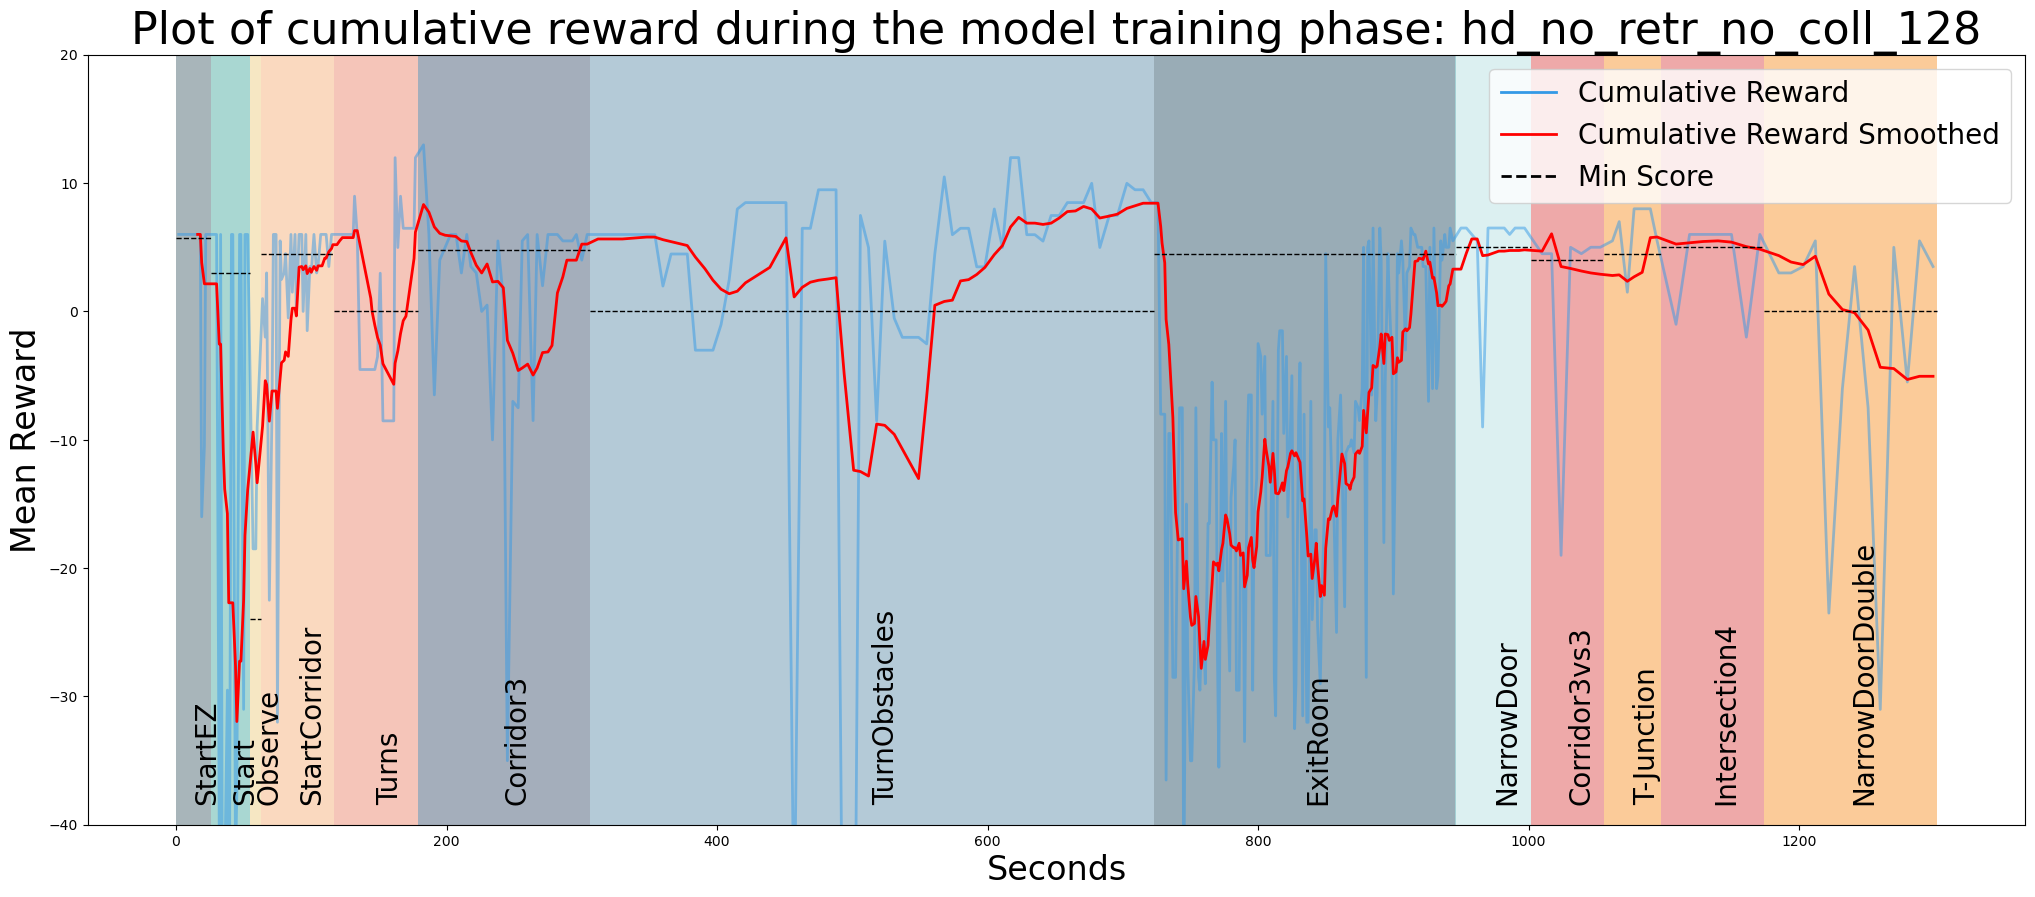

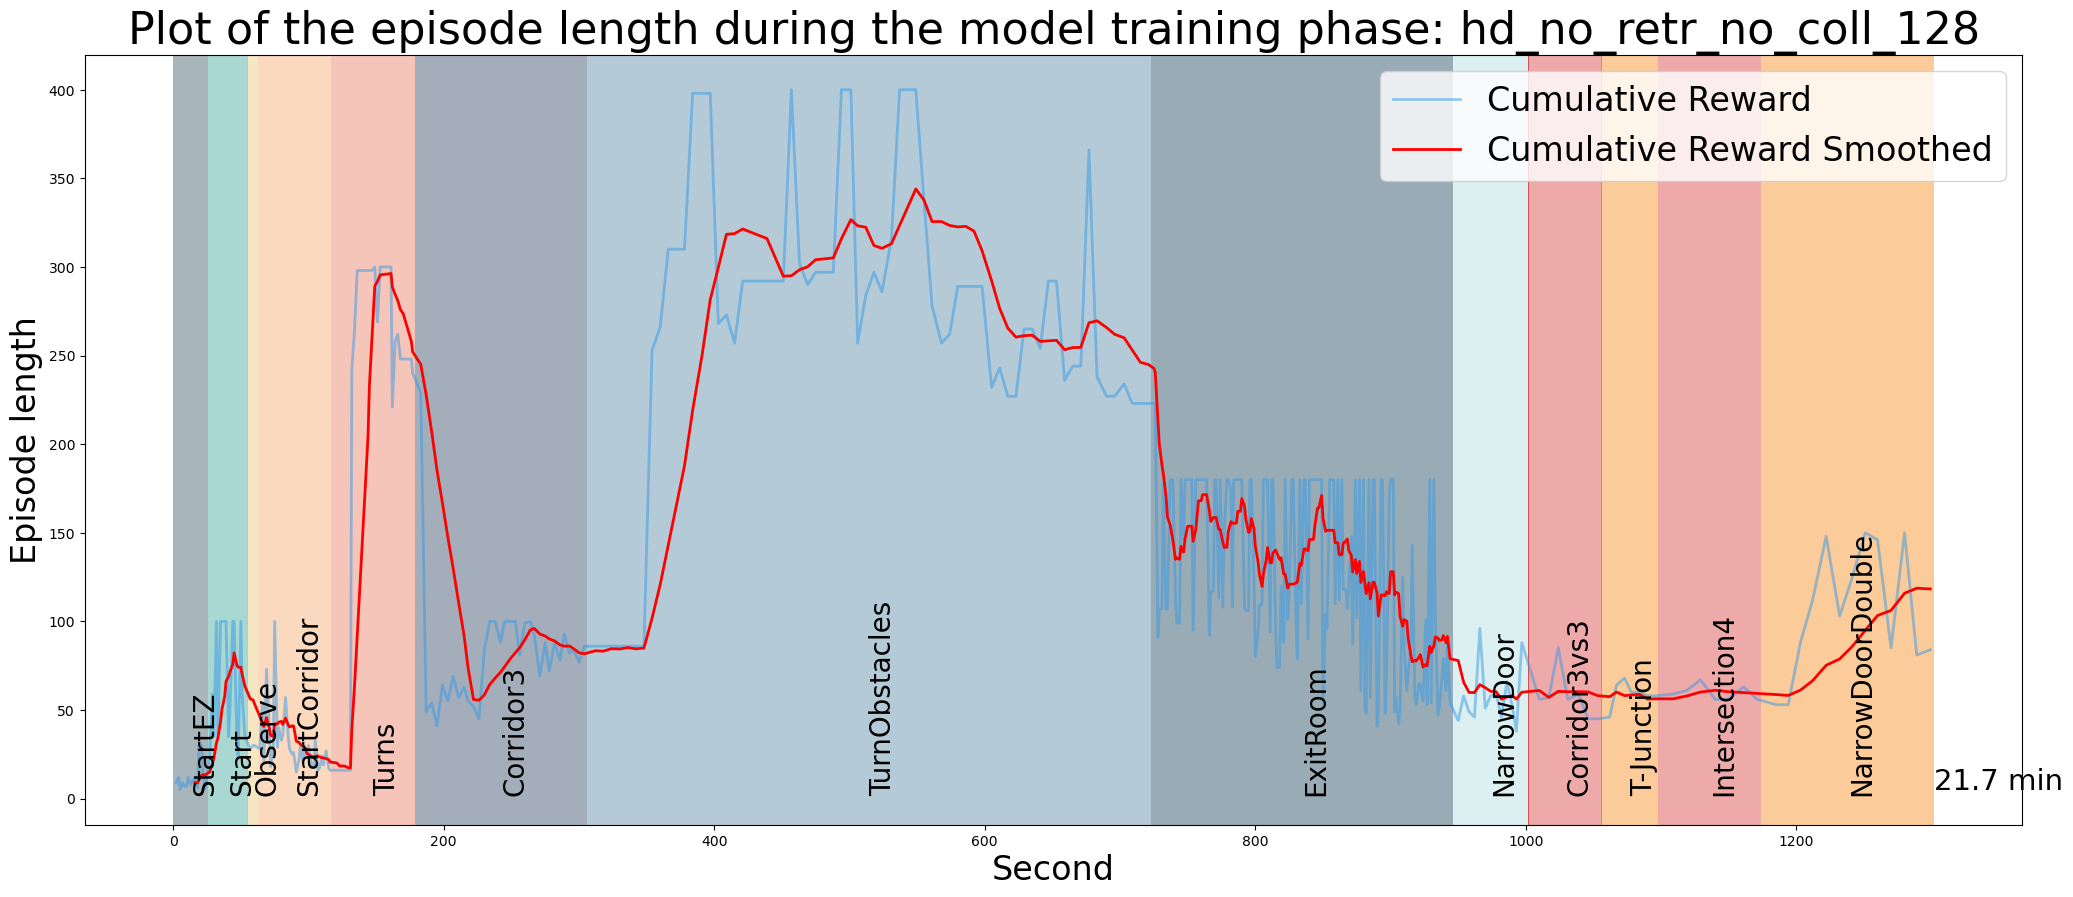

In [8]:
plot_cumulative_reward(df_env_cumulative_reward, df_wall, name)

if os.path.exists(path_env_episode_length):
    df_env_episode_length = pd.read_csv(path_env_episode_length, decimal=".", delimiter=",")
    df_env_episode_length['Wall time'] = df_env_episode_length['Wall time'].astype(int).apply(extract_last_six_digits).astype(int)
    plot_episode_length(df_env_episode_length, df_wall, name)